# Создаём точку входа в Spark

In [1]:
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.0-py2.py3-none-any.whl size=311317130 sha256=ddb09afc99598b42461515c2971e848483b3f2c9f8a5ab9dc0c51e5707656a28
  Stored in directory: /root/.cache/pip/wheels/7b/1b/4b/3363a1d04368e7ff0d408e57ff57966fcdf00583774e761327
Successfully built pyspark


In [2]:
from pyspark.sql import SparkSession

spark = SparkSession.builder\
        .master('local[4]')\
        .appName('Lesson_2')\
        .config('spark.ui.port', '4050')\
        .config('spark.executor.instances', 2)\
        .config('spark.executor.memory', '4g')\
        .config('spark.executor.cores', 2)\
        .getOrCreate()

sc = spark.sparkContext


# Вспомогательная функция

def beautiful_print(rdd, num, title):
    print(title)
    for row in rdd.take(num):
        print('\t', row)

# Самостоятельная работа

Требуется выяснить:
1. Какое соотношение сторон экрана телефона самое популярное,
2. Плотность пикселей у экрана.

Можно использовать только rdd.


## Считывание данных
Данные взяты отсюда: https://www.kaggle.com/iabhishekofficial/mobile-price-classification
Скачиваем и копируем в папку с нотебуком

Внутри содержится следующая информация:

* id: ID
* battery_power: Total energy a battery can store in one time (mAh)
* blue: Support bluetooth or not
* clock_speed: Speed at which microprocessor executes instructions
* dual_sim: Support dual sim or not
* fc: Front Camera mega pixels
* four_g: Support 4G or not
* int_memory: Internal Memory (GB)
* m_dep: Mobile Depth (cm)
* mobile_wt: Weight of mobile phone
* n_cores: Number of cores of processor
* pc: Primary Camera mega pixels
* px_height: Pixel Resolution Height
* px_width: Pixel Resolution Width
* ram: Random Access Memory (MB)
* sc_h: Screen Height of mobile (cm)
* sc_w: Screen Width of mobile (cm)
* talk_time: Time that a single battery charge will last
* three_g: Support 3G or not
* touch_screen: Has touch screen or not
* wifi: Support wifi or not

In [3]:
train = sc.textFile('train.csv')
beautiful_print(train, 3, 'Train:')
train_first_row = train.first()
print(f"Train size: {train.count()} x {len(train_first_row.split(','))}")

Train:
	 battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
	 842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
	 1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
Train size: 2001 x 21


In [4]:
# Задание 1
#  Прочитайте test.csv

In [5]:
test = sc.textFile('test.csv')
beautiful_print(test, 3, 'Test:')
test_first_row = test.first()
print(f"Test size: {test.count()} x {len(test_first_row.split(','))}")

Test:
	 id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
	 1,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
	 2,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
Test size: 1001 x 21


##  Преобразуем train и test

In [6]:
train = train\
    .filter(lambda row: row != train_first_row)\
    .map(lambda row: [float(el) for el in row.split(',')])
    
train_header = train_first_row.split(',')
beautiful_print(train, 3, train_header)

['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi', 'price_range']
	 [842.0, 0.0, 2.2, 0.0, 1.0, 0.0, 7.0, 0.6, 188.0, 2.0, 2.0, 20.0, 756.0, 2549.0, 9.0, 7.0, 19.0, 0.0, 0.0, 1.0, 1.0]
	 [1021.0, 1.0, 0.5, 1.0, 0.0, 1.0, 53.0, 0.7, 136.0, 3.0, 6.0, 905.0, 1988.0, 2631.0, 17.0, 3.0, 7.0, 1.0, 1.0, 0.0, 2.0]
	 [563.0, 1.0, 0.5, 1.0, 2.0, 1.0, 41.0, 0.9, 145.0, 5.0, 6.0, 1263.0, 1716.0, 2603.0, 11.0, 2.0, 9.0, 1.0, 1.0, 0.0, 2.0]


In [7]:
# Задание 2
#  Приведите test.csv к аналогичному виду, что и train

In [8]:
test = test\
    .filter(lambda row: row != test_first_row)\
    .map(lambda row: [float(el) for el in row.split(',')])

test_header = test_first_row.split(',')
beautiful_print(test, 3, test_header)

['id', 'battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi']
	 [1.0, 1043.0, 1.0, 1.8, 1.0, 14.0, 0.0, 5.0, 0.1, 193.0, 3.0, 16.0, 226.0, 1412.0, 3476.0, 12.0, 7.0, 2.0, 0.0, 1.0, 0.0]
	 [2.0, 841.0, 1.0, 0.5, 1.0, 4.0, 1.0, 61.0, 0.8, 191.0, 5.0, 12.0, 746.0, 857.0, 3895.0, 6.0, 0.0, 7.0, 1.0, 0.0, 0.0]
	 [3.0, 1807.0, 1.0, 2.8, 0.0, 1.0, 0.0, 27.0, 0.9, 186.0, 3.0, 4.0, 1270.0, 1366.0, 2396.0, 17.0, 10.0, 10.0, 0.0, 1.0, 1.0]


## Объединим train и test
Найти нужную функцию можно [здесь](https://spark.apache.org/docs/3.1.1/api/python/reference/pyspark.html#rdd-apis)

PS: нужно сделать средсвтвами rdd pd.concat([train, test,], axis=0)

In [9]:
# Задание 3
#  Объедините данные

In [10]:
for i,j in zip(train_header[:-1], test_header[1:]):
  print(f'{i} - {j}')

battery_power - battery_power
blue - blue
clock_speed - clock_speed
dual_sim - dual_sim
fc - fc
four_g - four_g
int_memory - int_memory
m_dep - m_dep
mobile_wt - mobile_wt
n_cores - n_cores
pc - pc
px_height - px_height
px_width - px_width
ram - ram
sc_h - sc_h
sc_w - sc_w
talk_time - talk_time
three_g - three_g
touch_screen - touch_screen
wifi - wifi


In [11]:
# train = train.map(lambda row: ','.join(row.split(',')[:-1]))
train = train\
  .map(lambda row: row[:-1])
train_header = train_header[:-1]

test = test\
  .map(lambda row: row[1:])
test_header = test_header[1:]

In [12]:
train = train.map(lambda row: row[:-1])

train_header = train_header[:-1]
beautiful_print(train, 3, train_header)

['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen']
	 [842.0, 0.0, 2.2, 0.0, 1.0, 0.0, 7.0, 0.6, 188.0, 2.0, 2.0, 20.0, 756.0, 2549.0, 9.0, 7.0, 19.0, 0.0, 0.0]
	 [1021.0, 1.0, 0.5, 1.0, 0.0, 1.0, 53.0, 0.7, 136.0, 3.0, 6.0, 905.0, 1988.0, 2631.0, 17.0, 3.0, 7.0, 1.0, 1.0]
	 [563.0, 1.0, 0.5, 1.0, 2.0, 1.0, 41.0, 0.9, 145.0, 5.0, 6.0, 1263.0, 1716.0, 2603.0, 11.0, 2.0, 9.0, 1.0, 1.0]


In [13]:
union_data = train.union(test)
union_data.count()

3000

## Рассчитайте соотношение сторон экрана и его плотность пикселей

In [14]:
# Задание 4
#  Рассчитайте соотношение сторон экрана и найдите широкоформатные, выведите это распределение

In [15]:
print(train_header[11], train_header[12])

px_height px_width


In [16]:
from matplotlib import pyplot as plt

aspect_ratio = union_data\
  .filter(lambda row: row[11] != 0)\
  .map(lambda row: ('wide', 1) if row[12]/row[11] >= (16/9) else ('not wide', 1))\
  .reduceByKey(lambda x, y: x + y)\
  .sortByKey()

<Axes: xlabel='0'>

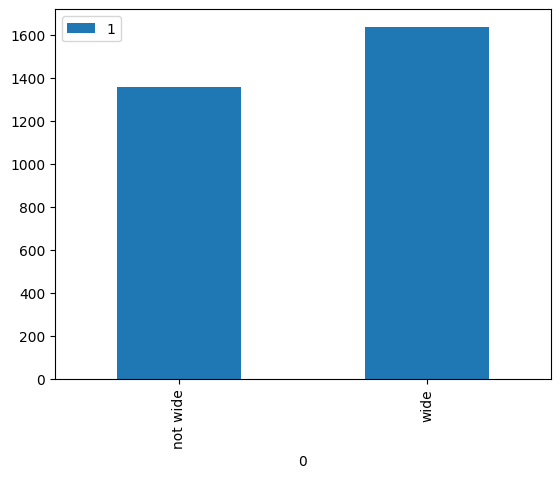

In [17]:
import pandas as pd

pd.DataFrame(aspect_ratio.collect()).set_index(0).plot.bar()

In [18]:
df = aspect_ratio.collect()

In [19]:
# Задание 5
#  Рассчитайте плотность пикселей (лучше ppi), выведите это распределение

In [20]:
for i, name in enumerate(train_header):
  print(f'{i} - {name}')

0 - battery_power
1 - blue
2 - clock_speed
3 - dual_sim
4 - fc
5 - four_g
6 - int_memory
7 - m_dep
8 - mobile_wt
9 - n_cores
10 - pc
11 - px_height
12 - px_width
13 - ram
14 - sc_h
15 - sc_w
16 - talk_time
17 - three_g
18 - touch_screen


In [21]:
import matplotlib.ticker as ticker

Text(0.5, 0, '')

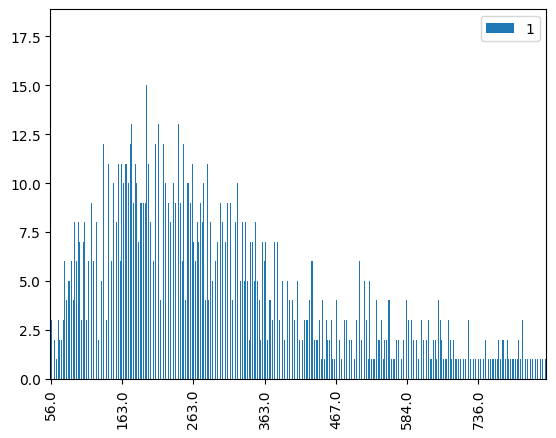

In [22]:
pixel_density = union_data\
.map(lambda row: (round((row[11]**2 + row[12]**2)**0.5/(((row[14]*0.393701)**2 + (row[15]*0.393701)**2)**0.5),0), 1))\
.reduceByKey(lambda x, y: x + y)\
.sortByKey()

bars = pd.DataFrame(pixel_density.collect()).set_index(0).plot.bar()
bars.xaxis.set_major_locator(ticker.MultipleLocator(100))
bars.set_xlabel(None)

# JOIN
Повторите вышеописанное задание с помощью одной из функций ниже (отдельно рассчитайте для train и test, затем объедините результат)

Пример для двух RDDs: (rdd = {(1, 2), (3, 4), (3, 6)} other = {(3, 9)})

Имя функции |	Purpose |	Example |	Result
------------- |	------- |	------- |	------
subtractByKey |Remove elements with a key present in the other RDD.| rdd.subtractByKey(other) | {(1, 2)}
join | Perform an inner join between two RDDs. | rdd.join(other) | {(3, (4, 9)), (3, (6, 9))}
rightOuterJoin | Perform a join between two RDDs where the key must be present in the first RDD. | rdd.rightOuterJoin(other) | {(3,(Some(4),9)), (3,(Some(6),9))}leftOuterJoin | Perform a join between two RDDs where the key must be present in the other RDD. | rdd.
leftOuterJoin(other) | {(1,(2,None)), (3,(4,Some(9))), (3,(6,Some(9)))}
cogroup | Group data from both RDDs sharing the same key. | rdd.cogroup(other) | {(1,([2],[])), (3,([4, 6],[9]))}


In [23]:
# Задание 6
#  Рассчитайте для train и test, затем объедините результат

Text(0.5, 0, '')

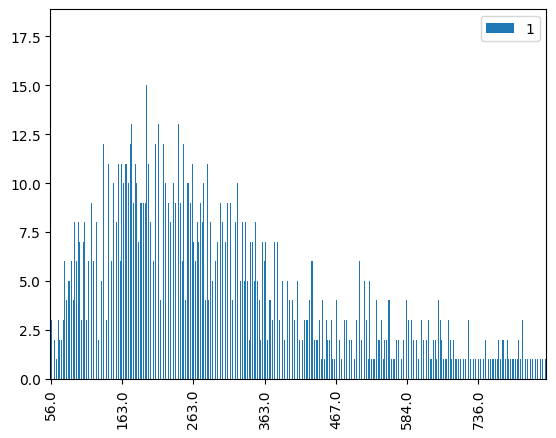

In [29]:
pixel_density_train = train\
.map(lambda row: (round((row[11]**2 + row[12]**2)**0.5/(((row[14]*0.393701)**2 + (row[15]*0.393701)**2)**0.5),0), 1))\
.reduceByKey(lambda x, y: x + y).sortByKey()

pixel_density_test = test\
.map(lambda row: (round((row[11]**2 + row[12]**2)**0.5/(((row[14]*0.393701)**2 + (row[15]*0.393701)**2)**0.5),0), 1))\
.reduceByKey(lambda x, y: x + y).sortByKey()

pixel_density_union = pixel_density_train.cogroup(pixel_density_test).map(lambda row: (row[0], sum(row[1][0].data + row[1][1].data))).sortByKey()
bars = pd.DataFrame(pixel_density_union.collect()).set_index(0).plot.bar()
bars.xaxis.set_major_locator(ticker.MultipleLocator(100))
bars.set_xlabel(None)